## Úkol 1 - Svařované krabičky

Máme firmu na výrobu svařovaných krabiček. Výrobce plechů nám dodává plech o šířce *a* a výšce *b*. Naším úkolem je zjistit, jak velké kusy v rozích odstřihnout, abychom maximalizovali objem krabičky. Krabička nemá víko, má jenom dno a čtyři strany (viz následující obrázek).

![Metal sheet](./data/boxes.svg)

Objem naší krabičky tedy bude:
$$V(x) = x (a-2x) (b-2x) = abx - 2ax^2 - 2bx^2 + 4x^3$$
A naše úloha tedy bude (předpokládejme, že $a \leq b$):
$$\underset{x}{\arg\max} \ V(x), \ subject \ to: \ x\in(0,\frac{1}{2}a)$$
To je jenom složite napsané, že hledáme takový parametr $x$, aby funkce $V(x)$ byla co možná největší. Přitom však $x$ musí být z intervalu $(0,\frac{1}{2}a)$.

Možná vám bude úloha ze začátku připadat složitá, ale ve skutečnosti je to středoškolská matematika. Vykreslíme si funkci objemu v závislosti na *x* pro zvolené *a* a *b*. 

In [8]:
import matplotlib.pyplot as plt
import numpy as np

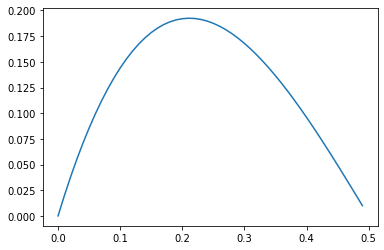

In [10]:
a, b = 1., 2.
x = np.arange(0., a/2, 0.01)
v = x * (a - 2*x) * (b - 2*x)
plt.plot(x, v)

Optimální řešení se nacházi v bodě, kde je objem největší. Z matematického hlediska musíme vyřešit pouze 2 typy bodů:

1. Začátek a konec intervalu intervalu ($x=0, x=\frac{1}{2}a$)
2. Body, prok teré platí $\frac{dV(x)}{dx} = 0$ a zároveň jsou v našem v intervalu

Derivace naší funkce objemu potom je:
$$\frac{dV(x)}{dx} =  ab-4ax-4bx+12x^2$$

Zkusme si ji vykreslit a podívat se, kde je její hodnota přibližně $0$.

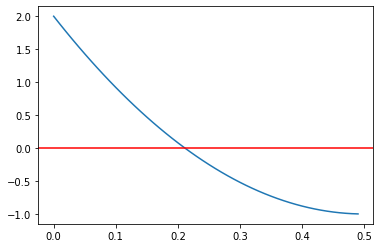

In [16]:
dv = a*b - 4*a*x - 4*b*x + 12*x*x
plt.plot(x, dv)
plt.axhline(0.0, color="r") 

Tento příklad je samozřejmě tak jednoduchý, že ho můžeme vyřešit analyticky, je to polynom 2. řádu.

In [23]:
# koeficienty kvadratického polynomu
poly_a = 12.
poly_b = -4*a - 4*b
poly_c = a*b
diskriminant = poly_b**2 - 4*poly_a*poly_c
x1 = (-poly_b + np.sqrt(diskriminant))/2./poly_a 
x2 = (-poly_b - np.sqrt(diskriminant))/2./poly_a
print(f"roots are {x1:2f} and {x2:2f}")

roots are 0.788675 and 0.211325


Musíme ještě ověřit, který z kořenů patří a který nepatří do našeho intervalu $(0, \frac{1}{2}a)$:

In [27]:
solution = x1 if x1 >= 0 and x1 <= a/2 else x2
solution

0.21132486540518713

Zkusme zakreslit do grafu (funkci objemu jsem vynásobil 20 krát, aby byla v grafu pěkně vidět, protože nám jde hlavně o tvar):

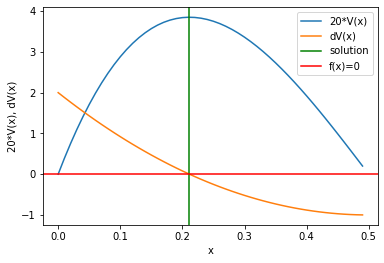

In [41]:
plt.figure()
plt.plot(x, 20*v, label="20*V(x)")
plt.plot(x, dv, label="dV(x)")
plt.axvline(solution, color="g", label="solution")
plt.axhline(0, color="r", label="f(x)=0")
plt.legend()
plt.xlabel("x")
plt.ylabel("20*V(x), dV(x)")
plt.show()

Zkuste se zamyslet, jestli můžou nastat případy, kdy diskriminant bude záporný? Má tento postup nějaká úskalí?